In [106]:
## 导入需要的库
import numpy as np
import pandas as pd
import math
import os
import random
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

In [4]:
data = pd.read_csv("随机挑选后的股票数据.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.003474,0.021449,0.002544,0.026737,-0.019983,0.001678,-0.018642,0.026172,0.001667,-0.014248,...,0.018799,-0.005187,-0.005737,-0.003666,-0.010554,0.003178,-0.000530,0.005277,0.004725,-0.010532
1,-0.015129,0.021117,-0.002990,-0.006006,0.023811,0.051587,-0.011236,-0.007087,0.000000,-0.005706,...,-0.003231,0.006452,0.000000,0.006410,0.006369,-0.016000,-0.016261,0.009788,-0.003252,0.000000
2,-0.051245,0.000000,0.014773,-0.012791,-0.001982,-0.028171,0.002039,-0.051188,-0.001070,-0.009702,...,0.018603,-0.018603,0.004681,-0.018867,0.046520,-0.013731,0.009173,0.018103,0.000000,0.048147
3,-0.002189,-0.001096,-0.003289,-0.022223,-0.004503,0.015676,-0.027027,0.015854,0.014498,0.035897,...,-0.084007,0.035320,-0.105115,-0.104027,-0.010752,0.021389,0.005280,0.058766,-0.050902,-0.075915
4,0.011728,-0.006825,0.007797,-0.033567,-0.040989,0.013506,0.032490,-0.016113,-0.044635,-0.001063,...,0.008656,0.017095,0.029232,-0.014511,-0.016839,-0.008531,-0.004291,0.012822,-0.004259,0.006377


In [9]:
n, m = len(data), len(data.T)
data1 = np.zeros((n,m))
t = 0
for i in range(0,n):
    a = 1
    for j in range(0,m):
        a = a + data.loc[i][j]
        data1[t][j] = a
    t = t + 1
data1 = pd.DataFrame(data1)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,1.003474,1.024923,1.027467,1.054204,1.034221,1.035899,1.017257,1.043428,1.045095,1.030847,...,1.894176,1.888989,1.883252,1.879586,1.869032,1.872209,1.871680,1.876957,1.881682,1.871150
1,0.984871,1.005988,1.002999,0.996992,1.020803,1.072390,1.061154,1.054067,1.054067,1.048361,...,0.232052,0.238503,0.238503,0.244914,0.251283,0.235283,0.219022,0.228810,0.225558,0.225558
2,0.948755,0.948755,0.963528,0.950737,0.948755,0.920584,0.922622,0.871434,0.870364,0.860662,...,0.665537,0.646933,0.651614,0.632748,0.679268,0.665537,0.674710,0.692813,0.692813,0.740960
3,0.997811,0.996715,0.993427,0.971204,0.966701,0.982377,0.955350,0.971204,0.985702,1.021599,...,1.263960,1.299280,1.194164,1.090138,1.079386,1.100775,1.106054,1.164820,1.113919,1.038004
4,1.011728,1.004903,1.012701,0.979134,0.938145,0.951650,0.984140,0.968027,0.923392,0.922329,...,0.217519,0.234614,0.263846,0.249335,0.232496,0.223964,0.219673,0.232496,0.228237,0.234614


## 不同模型的聚类结果

In [37]:
# 我们模型的结果
lb1 = [20, 1, 4, 5, 6, 9, 16, 22, 25, 34, 36, 38, 43, 44, 46, 49]
lb2 = [12, 17, 27, 2, 3, 8, 10, 21, 23, 24, 26, 29, 30, 31, 33, 37, 47, 48]
lb3 = [0, 7, 11, 13, 14, 15, 18, 19, 28, 32, 35, 39, 40, 41, 42, 45]

## K-means聚类结果
A1 = [4, 5, 7, 14, 15, 18, 31, 32, 36, 37, 41, 45]
A2 = [0, 2, 3, 6, 8, 9, 10, 11, 12, 13, 16, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 38, 39, 42, 43, 44, 46, 47, 48, 49]
A3 = [1, 17, 19, 21, 40]

# 三支聚类结果
B1 = [0, 5, 9, 10, 19, 23, 26, 29, 30, 32, 35, 36, 41, 43, 45, 48]
B2 = [2, 3, 4, 8, 11, 12, 13, 14, 15, 17, 18, 20, 24, 27, 31, 33, 34, 37, 38, 39, 40, 42, 44, 46, 47, 49]
B3 = [1, 6, 7, 16, 21, 22, 25, 28]

# 基于遗憾理论的灰度关联聚类结果
C1 = [2, 3, 6, 9, 11, 18, 19, 21, 23, 30, 32, 33, 35, 37, 38, 41, 46]
C2 = [0, 1, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16, 17, 20, 22, 24, 25, 26, 27, 28, 29, 31, 34, 36, 39, 40, 42, 43, 44, 45, 47, 48, 49]

# 亲和传播聚类结果
D1 = [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
D2 = [2, 6, 21, 26]

# 逆方差聚类结果
E1 = [1, 3, 4, 5, 6, 9, 11, 12, 13, 16, 17, 21, 22, 26, 27, 29, 33, 35, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
E2 = [0, 2, 7, 8, 10, 14, 15, 18, 19, 20, 23, 24, 25, 28, 30, 31, 32, 34, 36, 37, 38, 41]

In [11]:
# 每个股票的期望收益率
ExpReturn = []

for i in range(0,n):
    ExpReturn.append(np.mean(data1.iloc[i]))
    ExpReturn[i] = round(ExpReturn[i], 3)
print(ExpReturn)

[2.098, 0.876, 1.283, 1.269, 0.716, 1.589, 1.325, 0.876, 1.146, 1.905, 2.042, 1.13, 1.086, 1.396, 1.238, 0.937, 0.847, 1.024, 1.172, 1.709, 0.92, 1.144, 0.27, 1.108, 0.893, 1.07, 1.52, 1.707, 0.755, 1.224, 2.125, 0.796, 1.531, 0.978, 1.011, 1.192, 1.656, 1.143, 1.378, 1.32, 1.364, 1.402, 0.89, 1.96, 2.104, 1.085, 1.247, 1.351, 1.774, 1.185]


In [15]:
# 每个股票的协方差矩阵
ExpCovar = np.cov(data1)
for i in range(0,n):
    for j in range(0,n):
        ExpCovar[i][j] = round(ExpCovar[i][j], 3)
ExpCovar = pd.DataFrame(ExpCovar)
ExpCovar.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.239,0.077,0.138,0.117,0.035,0.037,0.172,0.093,0.124,0.025,...,0.088,0.008,0.023,0.073,0.270,-0.002,0.054,0.143,-0.015,0.082
1,0.077,0.197,0.156,0.098,0.136,0.029,0.168,0.202,0.172,-0.096,...,0.074,-0.016,0.083,-0.053,0.203,-0.013,0.087,0.228,-0.105,0.123
2,0.138,0.156,0.265,0.152,0.124,0.000,0.307,0.194,0.193,-0.117,...,0.037,-0.027,0.116,0.004,0.351,0.008,0.092,0.203,-0.041,0.103
3,0.117,0.098,0.152,0.116,0.074,0.008,0.200,0.123,0.123,-0.071,...,0.032,-0.020,0.062,0.012,0.239,-0.006,0.056,0.140,-0.032,0.072
4,0.035,0.136,0.124,0.074,0.123,0.010,0.148,0.161,0.129,-0.094,...,0.030,-0.019,0.083,-0.051,0.171,-0.000,0.062,0.158,-0.062,0.086


In [16]:
ExpCovar.to_csv(r"50支股票的协方差矩阵.csv")

## K-means聚类结果下的投资组合

In [146]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = 0
while y == 0: 
    for k in range(0,len(A1)):
        a = A1[k]
        for j in range(0,len(A2)):
            b = A2[j]
            for i in range(0,len(w)):
                Y = w[i]*data1.iloc[a]+(1-w[i])*data1.iloc[b]
                s = pd.Series(Y)
                if np.mean(Y) > 1.8 and (np.std(Y))**2 < 0.25: 
                    if (np.mean(Y)-0.73)/np.std(Y) < 2.7 and (np.mean(Y)-0.73)/np.std(Y) >= 2:
                        print(a, b)
                        print(w[i])
                        print([np.mean(Y), np.std(Y), np.max(Y), np.min(Y), s.skew(), s.kurt()])
                        print((np.mean(Y)-0.73)/np.std(Y))
                        print(np.std(Y[1135:]))
                        print('*****************************')
                        y = 1
                else:
                    break
    y = 1

4 0
0.2
[1.821959983994846, 0.4108406169031769, 2.7751183172418608, 0.8466124937444701, 0.0014996649546217449, -0.4101971233825368]
2.6578676476191467
0.06829451326051497
*****************************
7 0
0.2
[1.8539126484180604, 0.43833527992376037, 2.9223600453495084, 0.8925888634688801, 0.16408148058540767, -0.5334980359172676]
2.5640478873011143
0.07730150517415955
*****************************
15 9
0.1
[1.8083534934798382, 0.39986936035739173, 2.8388864418873703, 0.9523728457481508, 0.8131239947390201, 0.37198487713392003]
2.69676449457402
0.29905945901808495
*****************************
31 0
0.2
[1.8378811511443656, 0.4105380629562497, 2.78595636071568, 0.861197597137752, -0.033369581807343174, -0.4003480408485074]
2.6986076349817787
0.06307733076659372
*****************************
32 9
0.1
[1.8676904004378452, 0.4406424456047789, 2.9989298706074456, 0.9522065151742589, 0.8756027097103923, 0.3757684681374869]
2.5818901737356974
0.31720695036198665
*****************************


In [148]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = 0
while y == 0: 
    for k in range(0,len(A3)):
        a = A3[k]
        for j in range(0,len(A2)):
            b = A2[j]
            for i in range(0,len(w)):
                Y = w[i]*data1.iloc[a]+(1-w[i])*data1.iloc[b]
                s = pd.Series(Y)
                if np.mean(Y) > 1.8 and (np.std(Y))**2 < 0.25: 
                    if (np.mean(Y)-0.73)/np.std(Y) < 2.7 and (np.mean(Y)-0.73)/np.std(Y) >= 2:
                        print(a, b)
                        print(w[i])
                        print([np.mean(Y), np.std(Y), np.max(Y), np.min(Y), s.skew(), s.kurt()])
                        print((np.mean(Y)-0.73)/np.std(Y))
                        print(np.std(Y[1135:]))
                        print('*****************************')
                        y = 1
                else:
                    break
    y = 1

1 0
0.2
[1.8538267974737206, 0.4302619536452164, 2.8837663946567815, 0.8965051825810644, 0.13574453988162463, -0.49294598665589273]
2.611959500375441
0.07941714310051733
*****************************
21 0
0.2
[1.9073870353887272, 0.4557924227841881, 2.889306907550067, 0.883399947982008, 0.037280496028011964, -0.4595441174267627]
2.5831650034827476
0.06890176032634676
*****************************
21 0
0.3
[1.8119155346220615, 0.44388204125936165, 2.8103814156884193, 0.892551133022528, 0.214196398360188, -0.7018249124763596]
2.4373942490498166
0.07146542560898539
*****************************


## 三支聚类结果下的投资组合

In [164]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = 0
while y == 0: 
    for k in range(0,len(B1)):
        a = B1[k]
        for j in range(0,len(B2)):
            b = B2[j]
            for i in range(0,len(w)):
                Y = w[i]*data1.iloc[a]+(1-w[i])*data1.iloc[b]
                s = pd.Series(Y)
                if np.mean(Y) > 1.7 and (np.std(Y))**2 < 0.25: 
                    if (np.mean(Y)-0.73)/np.std(Y) < 2.7 and (np.mean(Y)-0.73)/np.std(Y) >= 2:
                        print(a, b)
                        print(w[i])
                        print([np.mean(Y), np.std(Y), np.max(Y), np.min(Y), s.skew(), s.kurt()])
                        print((np.mean(Y)-0.73)/np.std(Y))
                        print(np.std(Y[1135:]))
                        print('*****************************')
                        y = 1
                else:
                    break
    y = 1

0 27
0.1
[1.7463217978086167, 0.47691604071304466, 2.6728885653593553, 0.7140896019876768, -0.2628204069949916, -1.0535926563396556]
2.1310287577853284
0.19476395565578192
*****************************
0 27
0.2
[1.7854338243767784, 0.4615950206329936, 2.6366306388657645, 0.8366127339129352, -0.34774154182194067, -1.061318594056439]
2.286493088529081
0.17501749769194802
*****************************
0 27
0.3
[1.8245458509449357, 0.45009930932064696, 2.6003727123721743, 0.8650815165130359, -0.4208999629068036, -1.0048547172799753]
2.431787448412169
0.15574163239891153
*****************************
0 27
0.4
[1.8636578775130974, 0.44272698745689393, 2.571308807726779, 0.8650838109970262, -0.4750673055365975, -0.8836638227171778]
2.560625192570796
0.13713494490634925
*****************************
0 27
0.5
[1.9027699040812582, 0.43968551782879345, 2.633472530187972, 0.8637630126553781, -0.5048930040307436, -0.7099397546467952]
2.6672925455277703
0.11951039977725904
**************************

## 基于遗憾理论的灰度关联聚类结果的投资组合

In [166]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = 0
while y == 0: 
    for k in range(0,len(C1)):
        a = C1[k]
        for j in range(0,len(C2)):
            b = C2[j]
            for i in range(0,len(w)):
                Y = w[i]*data1.iloc[a]+(1-w[i])*data1.iloc[b]
                s = pd.Series(Y)
                if np.mean(Y) > 1.8 and (np.std(Y))**2 < 0.25: 
                    if (np.mean(Y)-0.73)/np.std(Y) <= 2.7 and (np.mean(Y)-0.73)/np.std(Y) >= 2:
                        print(a, b)
                        print(w[i])
                        print([np.mean(Y), np.std(Y), np.max(Y), np.min(Y), s.skew(), s.kurt()])
                        print((np.mean(Y)-0.73)/np.std(Y))
                        print(np.std(Y[1135:]))
                        print('*****************************')
                        y = 1
                else:
                    break
    y = 1

2 0
0.2
[1.9353017745755288, 0.45512561423333786, 2.8962171511943953, 0.9126205626930843, -0.0472659789290084, -0.6724297873862874]
2.6482837636063787
0.09900263552572344
*****************************
2 0
0.3
[1.853787643402267, 0.445366200551011, 2.752578559378846, 0.9454264603540765, 0.07062543886772758, -0.9997288440903849]
2.523289019265286
0.11554146159613336
*****************************
3 0
0.3
[1.849472604800408, 0.4199234435569458, 2.712008067814376, 0.906428399295772, -0.05723216801160277, -0.5712469012575419]
2.665896896153159
0.07532394846554116
*****************************
6 0
0.1
[2.020995034113674, 0.4786481704540719, 3.033055102690196, 0.8673849075759762, -0.22360360913724195, -0.3303410247022467]
2.6971690561126884
0.08945172344116598
*****************************
6 0
0.2
[1.943660031305288, 0.47733427376711, 2.8826158705548997, 0.8775105257403516, -0.12911243245858092, -0.7891812734592984]
2.5425788551220383
0.12306307931290633
*****************************
6 0
0.3
[

## 基于亲和传播聚类结果的投资组合

In [172]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = 0
while y == 0: 
    for k in range(0,len(D1)):
        a = D1[k]
        for j in range(0,len(D2)):
            b = D2[j]
            for i in range(0,len(w)):
                Y = w[i]*data1.iloc[a]+(1-w[i])*data1.iloc[b]
                s = pd.Series(Y)
                if np.mean(Y) > 1.5 and (np.std(Y))**2 <= 0.25: 
                    if (np.mean(Y)-0.73)/np.std(Y) <= 2.7 and (np.mean(Y)-0.73)/np.std(Y) >= 2:
                        print(a, b)
                        print(w[i])
                        print([np.mean(Y), np.std(Y), np.max(Y), np.min(Y), s.skew(), s.kurt()])
                        print((np.mean(Y)-0.73)/np.std(Y))
                        print(np.std(Y[1135:]))
                        print('*****************************')
                        y = 1
                else:
                    break
    y = 1

0 26
0.1
[1.5779186056456023, 0.36215066223932624, 2.6246073494473414, 0.9635267678643891, 0.4641399765897613, -0.6530937077545618]
2.341342137558367
0.14550234617540106
*****************************
0 26
0.2
[1.6357420980096538, 0.3641085693187048, 2.678572191820103, 0.9887707355753691, 0.4483802092235631, -0.6534371178289877]
2.4875605089559327
0.1334931629769034
*****************************
0 26
0.3
[1.6935655903737037, 0.3696214687453451, 2.7325370341928648, 0.9906086831807362, 0.4051372961735586, -0.6315170702879689]
2.6068983320813626
0.1219585723456552
*****************************
0 26
0.4
[1.751389082737753, 0.37853406964081643, 2.7865018765656266, 0.9924466307861036, 0.33416518681191415, -0.5809647580872443]
2.698275174297862
0.11104656304264099
*****************************
5 26
0.1
[1.5269667124525272, 0.3365572353940942, 2.517663402563292, 0.9420371126309082, 0.4938721586763127, -0.578091491623332]
2.3679975607100325
0.14388441363712098
*****************************
5 26


## 基于逆协方差聚类结果的投资组合

In [175]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = 0
while y == 0: 
    for k in range(0,len(E1)):
        a = E1[k]
        for j in range(0,len(E2)):
            b = E2[j]
            for i in range(0,len(w)):
                Y = w[i]*data1.iloc[a]+(1-w[i])*data1.iloc[b]
                s = pd.Series(Y)
                if np.mean(Y) > 1.8 and (np.std(Y))**2 < 0.25: 
                    if (np.mean(Y)-0.73)/np.std(Y) <= 2.7 and (np.mean(Y)-0.73)/np.std(Y) >= 2:
                        print(a, b)
                        print(w[i])
                        print([np.mean(Y), np.std(Y), np.max(Y), np.min(Y), s.skew(), s.kurt()])
                        print((np.mean(Y)-0.73)/np.std(Y))
                        print(np.std(Y[1135:]))
                        print('*****************************')
                        y = 1
                else:
                    break
    y = 1

1 0
0.2
[1.8538267974737206, 0.4302619536452164, 2.8837663946567815, 0.8965051825810644, 0.13574453988162463, -0.49294598665589273]
2.611959500375441
0.07941714310051733
*****************************
3 0
0.3
[1.849472604800408, 0.4199234435569458, 2.712008067814376, 0.906428399295772, -0.05723216801160277, -0.5712469012575419]
2.665896896153159
0.07532394846554116
*****************************
4 0
0.2
[1.821959983994846, 0.4108406169031769, 2.7751183172418608, 0.8466124937444701, 0.0014996649546217449, -0.4101971233825368]
2.6578676476191467
0.06829451326051497
*****************************
6 0
0.1
[2.020995034113674, 0.4786481704540719, 3.033055102690196, 0.8673849075759762, -0.22360360913724195, -0.3303410247022467]
2.6971690561126884
0.08945172344116598
*****************************
6 0
0.2
[1.943660031305288, 0.47733427376711, 2.8826158705548997, 0.8775105257403516, -0.12911243245858092, -0.7891812734592984]
2.5425788551220383
0.12306307931290633
*****************************
6 0
0

## 不同投资组合的比较分析

[1.9073870353887272, 0.4557924227841881, 2.889306907550067, 0.883399947982008, 0.037280496028011964, -0.4595441174267627]
2.5831650034827476
0.06890176032634676


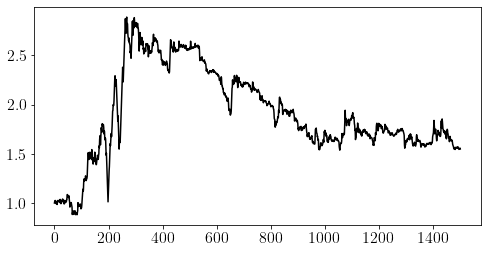

In [196]:
# K-means结果下的投资组合
plt.rcParams['figure.figsize'] = (8.0, 4.0)
Y1 = 0.2 * data1.iloc[21] + 0.8 * data1.iloc[0]
s = pd.Series(Y1)
print([np.mean(Y1), np.std(Y1), np.max(Y1), np.min(Y1), s.skew(), s.kurt()])
print((np.mean(Y1)-0.73)/np.std(Y1))
print(np.std(Y1[1135:]))

x = np.linspace(0,1500,1500)
plot(x,Y1,'k')
show()

[1.72716328257208, 0.37610198205389883, 2.591680541519952, 0.9536398150431102, -0.04421162866540624, -0.5379780210935077]
2.6513108947912363
0.15236989686405236


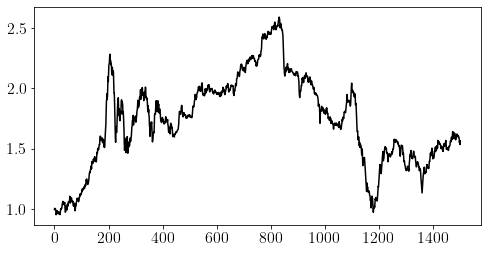

In [165]:
# 三支聚类结果下的投资组合
Y2 = 0.3 * data1.iloc[48] + 0.7 * data1.iloc[27]
s = pd.Series(Y2)
print([np.mean(Y2), np.std(Y2), np.max(Y2), np.min(Y2), s.skew(), s.kurt()])
print((np.mean(Y2)-0.73)/np.std(Y2))
print(np.std(Y2[1135:]))

plot(x,Y2,'k');
show()

[1.849472604800408, 0.4199234435569458, 2.712008067814376, 0.906428399295772, -0.05723216801160277, -0.5712469012575419]
2.665896896153159
0.07532394846554116


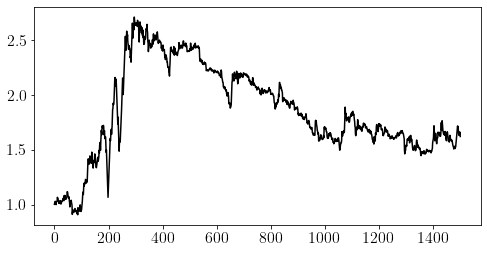

In [167]:
# 基于遗憾理论的灰度关联聚类结果的投资组合
Y3 = 0.3 * data1.iloc[3] + 0.7 * data1.iloc[0]
s = pd.Series(Y3)
print([np.mean(Y3), np.std(Y3), np.max(Y3), np.min(Y3), s.skew(), s.kurt()])
print((np.mean(Y3)-0.73)/np.std(Y3))
print(np.std(Y3[1135:]))

plot(x,Y3,'k');
show()

[1.5338383116234942, 0.3105608887291645, 2.464684298052004, 0.9889038769094185, 0.5340315146203976, -0.48971936434879826]
2.588343673644332
0.13036405617463162


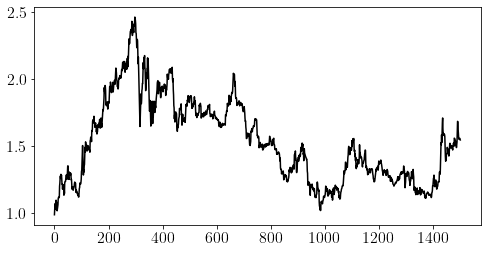

In [174]:
# 基于亲和传播聚类结果的投资组合
Y4 = 0.2 * data1.iloc[5] + 0.8 * data1.iloc[26]
s = pd.Series(Y4)
print([np.mean(Y4), np.std(Y4), np.max(Y4), np.min(Y4), s.skew(), s.kurt()])
print((np.mean(Y4)-0.73)/np.std(Y4))
print(np.std(Y4[1135:]))

plot(x,Y4,'k');
show()

[1.848134477535035, 0.41759680754672557, 2.776775826151039, 0.8938210286071875, -0.02038773948866405, -0.4251484357788464]
2.6775455590855426
0.08259579427150993


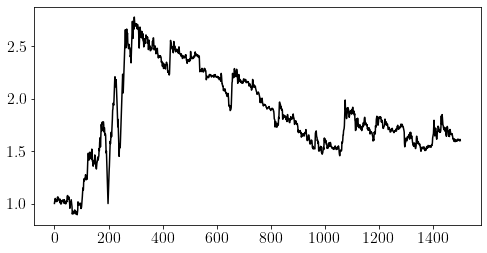

In [177]:
# 基于逆协方差聚类结果的投资组合
Y5 = 0.2 * data1.iloc[16] + 0.8 * data1.iloc[0]
s = pd.Series(Y5)
print([np.mean(Y5), np.std(Y5), np.max(Y5), np.min(Y5), s.skew(), s.kurt()])
print((np.mean(Y5)-0.73)/np.std(Y5))
print(np.std(Y5[1135:]))

plot(x,Y5,'k');
show()

In [178]:
Y = 0.9*data1.iloc[0]+0.1*data1.iloc[49]
Y1 = 0.2 * data1.iloc[21] + 0.8 * data1.iloc[0]
Y2 = 0.3 * data1.iloc[48] + 0.7 * data1.iloc[27]
Y3 = 0.3 * data1.iloc[3] + 0.7 * data1.iloc[0]
Y4 = 0.2 * data1.iloc[5] + 0.8 * data1.iloc[26]
Y5 = 0.2 * data1.iloc[16] + 0.8 * data1.iloc[0]

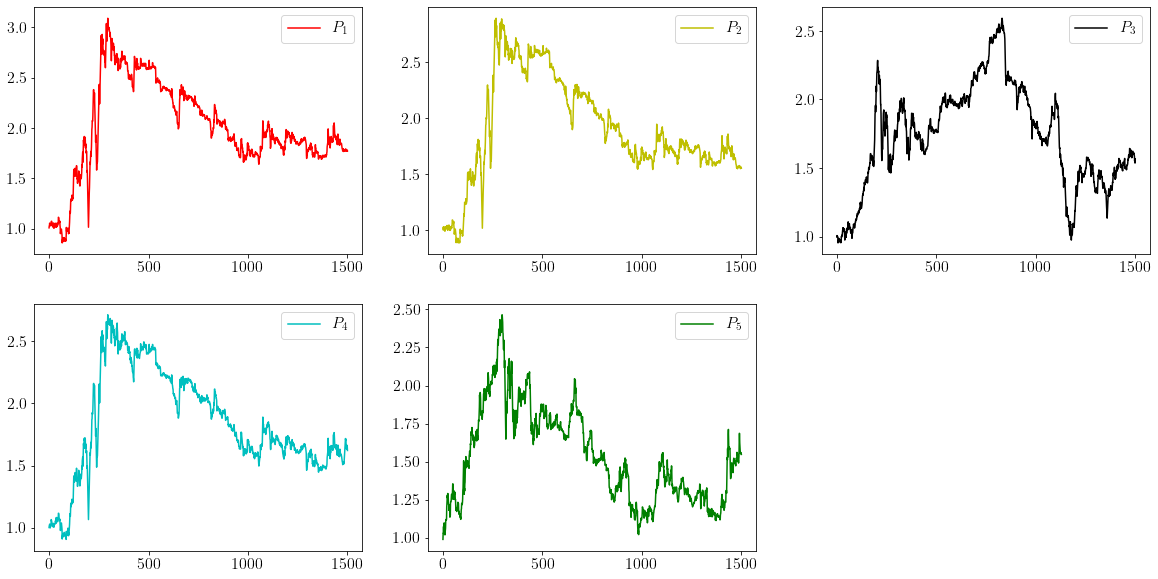

In [202]:
x = np.linspace(0,1500,1500)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

# 按两行三咧显示
a = subplot(2,3,1) #在第一窗口显示
a.plot(x,Y,'r', label = '$P_1$')
plt.legend()
b = subplot(2,3,2) #在第二个窗口显示
b.plot(x,Y1,'y',label = '$P_2$' )
plt.legend()
c = subplot(2,3,3)
c.plot(x,Y2,'k', label = '$P_3$')
plt.legend()
d = subplot(2,3,4) 
d.plot(x,Y3,'c', label = '$P_4$')
plt.legend()
e = subplot(2,3,5)
e.plot(x,Y4,'g', label = '$P_5$')
plt.legend()
# f = subplot(2,3,6) 
# f.plot(x,Y5,'b', label = '$P_6$')
plt.legend()
savefig("投资组合比较1.jpg",dpi=300, bbox_inches='tight')
show()

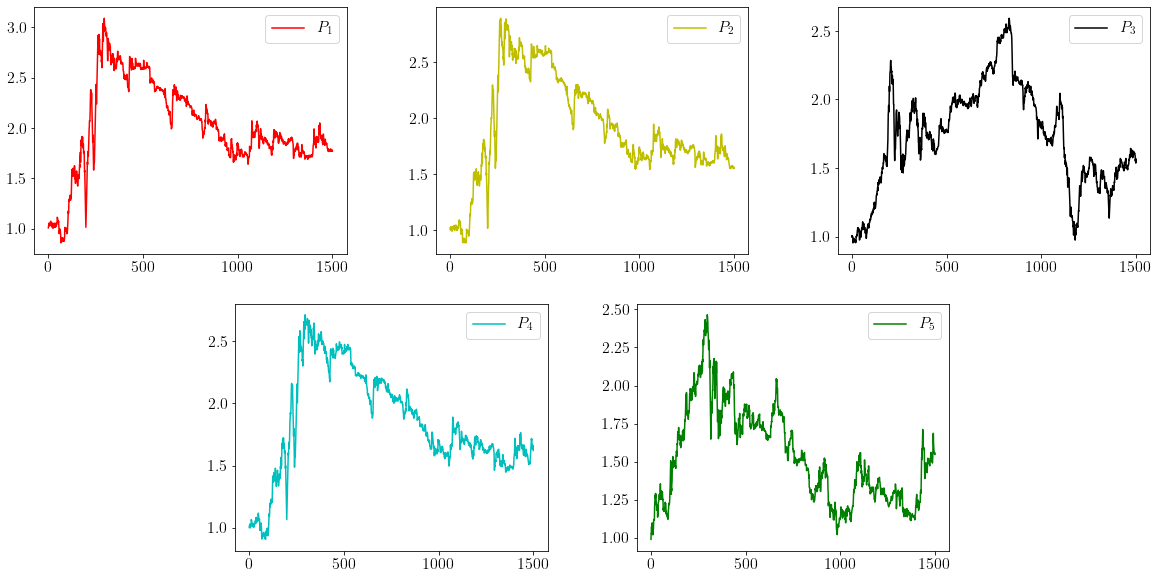

In [204]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
gs = gridspec.GridSpec(2, 6) # 创立2 * 6 网格
gs.update(wspace=0.8)
# 对第一行进行绘制
ax1 = plt.subplot(gs[0, :2]) # gs(哪一行，绘制网格列的范围)
ax1.plot(x,Y,'r', label = '$P_1$')
plt.legend()
ax2 = plt.subplot(gs[0, 2:4])
ax2.plot(x,Y1,'y',label = '$P_2$' )
plt.legend()
ax3 = plt.subplot(gs[0, 4:6])
ax3.plot(x,Y2,'k', label = '$P_3$')
plt.legend()
# 对第二行进行绘制
ax4 = plt.subplot(gs[1, 1:3])
ax4.plot(x,Y3,'c', label = '$P_4$')
plt.legend()
ax5 = plt.subplot(gs[1, 3:5])
ax5.plot(x,Y4,'g', label = '$P_5$')
plt.legend()
savefig("投资组合比较1.jpg",dpi=300, bbox_inches='tight')
plt.show()

In [180]:
s1, s2, s3, s4, s5 = pd.Series(Y1), pd.Series(Y2), pd.Series(Y3), pd.Series(Y4),pd.Series(Y5)
L1 = [np.mean(Y1), (np.std(Y1))**2, np.std(Y1), np.max(Y1), np.min(Y1), s1.skew(), s1.kurt(),    
     (np.mean(Y1)-0.73)/np.std(Y1), np.std(Y1[1135:])]

L2 = [np.mean(Y2), (np.std(Y2))**2, np.std(Y2), np.max(Y2), np.min(Y2), s2.skew(), s2.kurt(),    
     (np.mean(Y2)-0.73)/np.std(Y2), np.std(Y2[1135:])]

L3 = [np.mean(Y3), (np.std(Y3))**2, np.std(Y3), np.max(Y3), np.min(Y3), s3.skew(), s3.kurt(),    
     (np.mean(Y3)-0.73)/np.std(Y3), np.std(Y3[1135:])]

L4 = [np.mean(Y4), (np.std(Y4))**2, np.std(Y4), np.max(Y4), np.min(Y4), s4.skew(), s4.kurt(),    
     (np.mean(Y4)-0.73)/np.std(Y4), np.std(Y4[1135:])]

L5 = [np.mean(Y5), (np.std(Y5))**2, np.std(Y5), np.max(Y5), np.min(Y5), s5.skew(), s5.kurt(),    
     (np.mean(Y5)-0.73)/np.std(Y5), np.std(Y5[1135:])]

for i in range(len(L1)):
    L1[i] = round(L1[i],4)
    L2[i] = round(L2[i],4)
    L3[i] = round(L3[i],4)
    L4[i] = round(L4[i],4)
    L5[i] = round(L5[i],4)
print(L1)
print(L2)
print(L3)
print(L4)
print(L5)

[1.9074, 0.2077, 0.4558, 2.8893, 0.8834, 0.0373, -0.4595, 2.5832, 0.0689]
[1.7272, 0.1415, 0.3761, 2.5917, 0.9536, -0.0442, -0.538, 2.6513, 0.1524]
[1.8495, 0.1763, 0.4199, 2.712, 0.9064, -0.0572, -0.5712, 2.6659, 0.0753]
[1.5338, 0.0964, 0.3106, 2.4647, 0.9889, 0.534, -0.4897, 2.5883, 0.1304]
[1.8481, 0.1744, 0.4176, 2.7768, 0.8938, -0.0204, -0.4251, 2.6775, 0.0826]
